<a href="https://colab.research.google.com/github/SamuilSSP/BBR_SA/blob/main/BDF_guarantees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Development Fund Rwanda
<p>In 2011, the Government of Rwanda established Business Development Fund (BDF) as a wholly owned subsidiary of the Development Bank of Rwanda (BRD) , with the objective of assisting SMEs to access finance, particularly those without sufficient collateral to obtain credit from traditional financial institutions at reasonable rates. The Government also consolidated the different funds provisioned for SME financial support that had been spread across various ministries and agencies under BDF. These included the SME Guarantee Fund, the Agricultural Guarantee Fund, the Rural Investment Facility, the Women’s Guarantee Fund and the Retrenched Civil Servants Guarantee Fund . 
Since its inception, BDF has supported over 42 000 businesses  and partnered with over 400 financial institutions. Over the last years, BDF has witnessed a declining guarantee portfolio. In 2020, BDF provided guarantees worth RWF 3.45 billion, RWF 3.67 billion in 2019, RWF 5.1 billion in 2018 and RWF 5.7 billion in 2017. The fund employs a total of 130 staff, 32 of which work exclusively on the CGS.</p>
<p>The map below shows the layout of Rwanda; it is split into five administrative regions. The central area around the Capital city, Kigali, is one region, and the others are North, East, South, and West.</p>
<p><img src="https://assets.datacamp.com/production/project_515/img/RwandaGeoProvinces.png" alt="A map of the five administrative regions of Rwanda"></p>
<p>In this notebook, BDF portfolio data is imported, manipulated and visualized.</p>

In [2]:
# Load the readr and dplyr packages
library(readr)
library(tidyverse)

# Import BDF dataset
Rwanda_PFIs <- read_csv("Rwanda_PFIs1.csv")
Rwanda_PFIs$Age<-as.numeric(Rwanda_PFIs$Age)
Rwanda_PFIs$Year1<-as.character(Rwanda_PFIs$Year)
Overview1 <- read_csv("Overview1.csv")
# Take a glimpse at the contents

Rwanda_PFIs%>% mutate(GC=Total_GA/Total_LA)%>%
group_by(PFI_type)%>%
summarise(Guarantee_Portfolio =sum(Total_GA),Average_coverage=mean(GC),
          Average_Interest = mean(Interest), Application_days=mean(Application_days, na.rm=TRUE), count=n())%>%
mutate(Count_share = count / sum(count), Amount_share = Guarantee_Portfolio/sum(Guarantee_Portfolio))

head(Rwanda_PFIs)

Rows: 4234 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): PFI_type, PFI_name, G_type, DPD, Ref, Age, Gender, Economic_activi...
dbl  (6): Total_GA, Total_LA, Year, Interest, Application_days, Loan_period

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Rows: 1447 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Province, PFI_type, Q, Group
dbl (1): Area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


PFI_type,Guarantee_Portfolio,Average_coverage,Average_Interest,Application_days,count,Count_share,Amount_share
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Bank,9828727221,0.4935774,16.27825,34.79556,228,0.05384979,0.7208232
MFI,2054104920,0.6171201,18.00387,17.18124,1166,0.27538970,0.1506448
Sacco,1752587391,0.5117917,19.59112,16.08769,2840,0.67076051,0.1285320


PFI_type,PFI_name,G_type,Total_GA,Total_LA,Year,Interest,DPD,Application_days,Ref,Age,Gender,Economic_activity,Guarantee_bins,Legal_status,Loan_period,Province,Sector,District,Year1
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037217,41,Female,Business Services Other,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037218,42,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037220,52,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037229,47,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037232,48,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,Abahizi Tumba,SME,650000,1e+06,2019,30,0 days,17,AP-FI/07/2019/0021845,27,Male,Wholesale and Distribution Other,2. 500-1000K,Individual,24,NORTHERN PROVINCE,TUMBA,RULINDO,2019


## 2.  Total guarantee volumes
<p>Based on start Year and Guarantee amount</p>
<p>BDF covers the full range of customers from micro, SMEs and large companies</p>
<p>Clear distinction between Banks, MFIs and SACCOs</p>
<p>In term of guarantee volumes the overlaping is just for the extreme cases</p>


Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

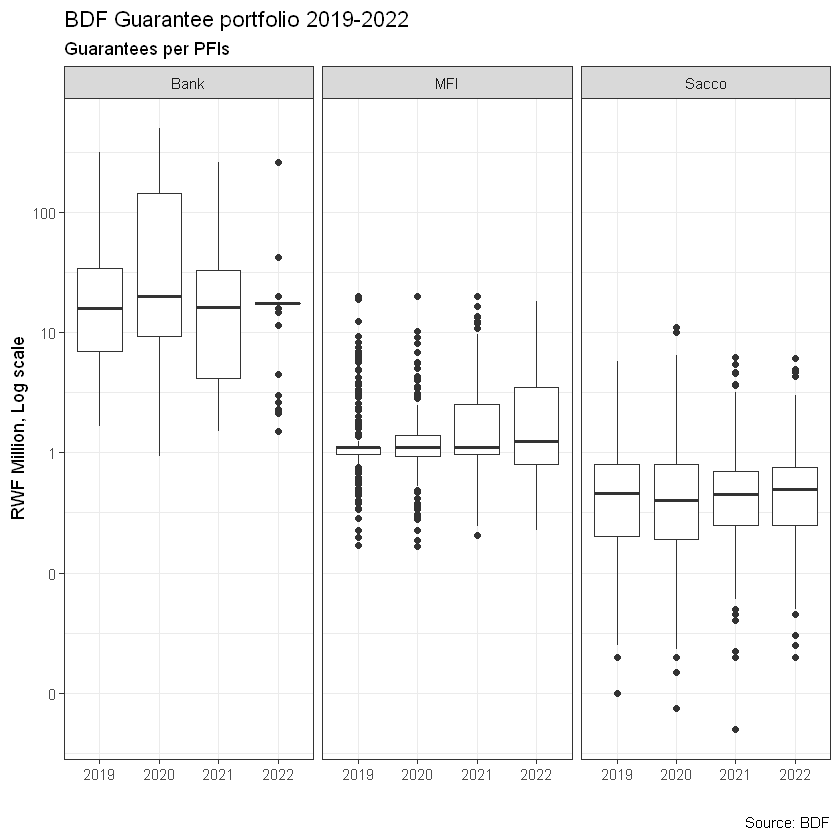

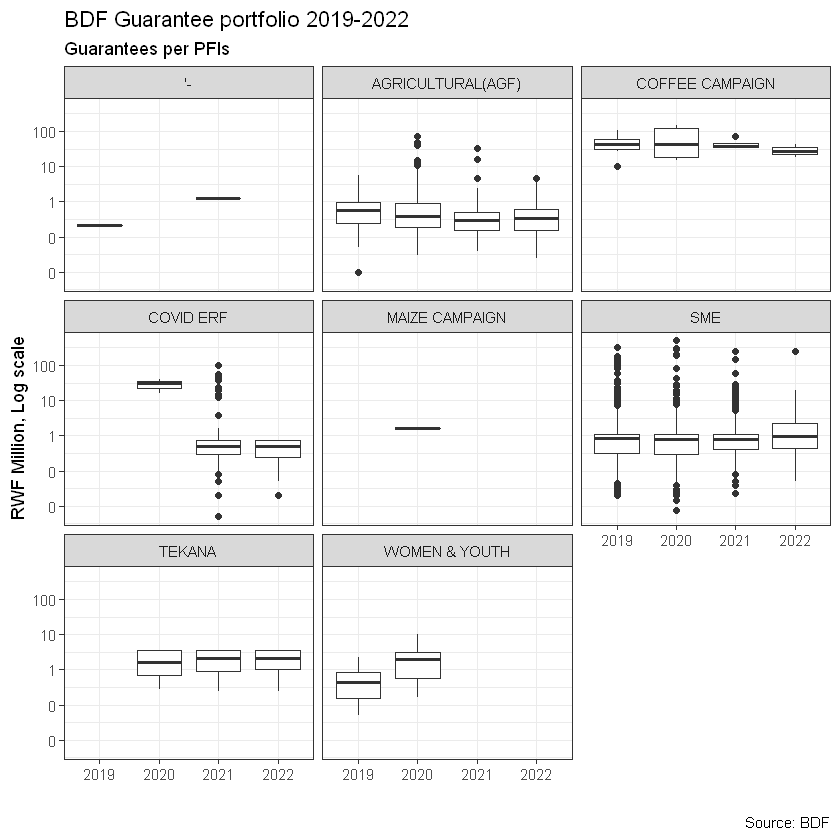

In [ ]:
# 1 total guarantee volume
ggplot(Rwanda_PFIs, aes(Year1, Total_GA/1000000))+
geom_boxplot()+
scale_y_log10(name="RWF Million, Log scale",
              labels = scales::comma)+
theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Guarantees per PFIs",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~PFI_type)

ggplot(Rwanda_PFIs, aes(Year1, Total_GA/1000000))+
geom_boxplot()+
scale_y_log10(name="RWF Million, Log scale",
              labels = scales::comma)+
theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Guarantees per PFIs",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~G_type)





Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


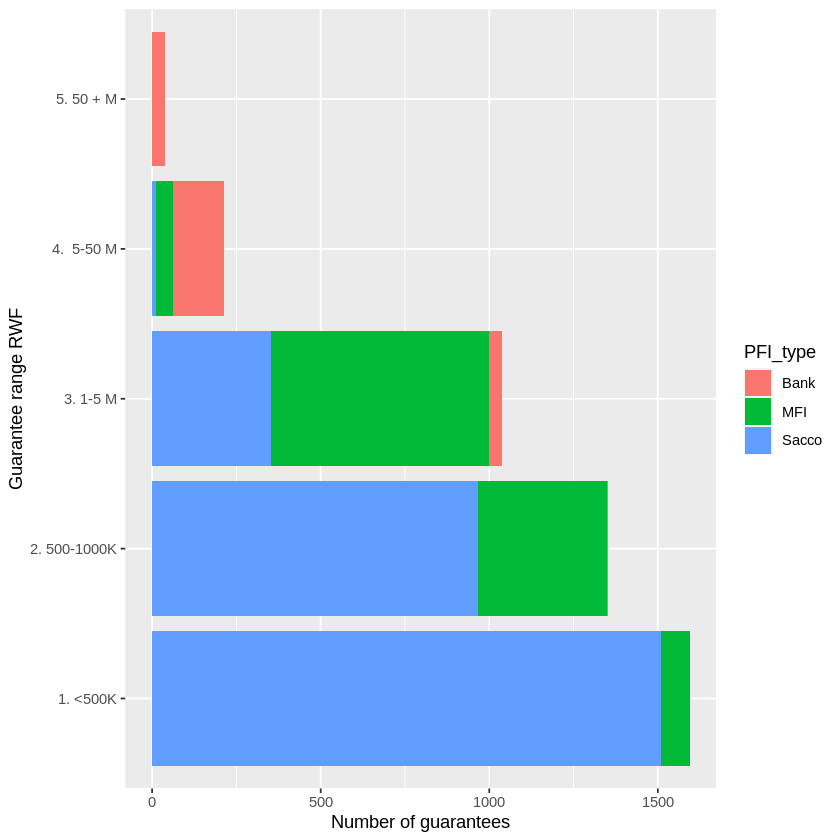

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


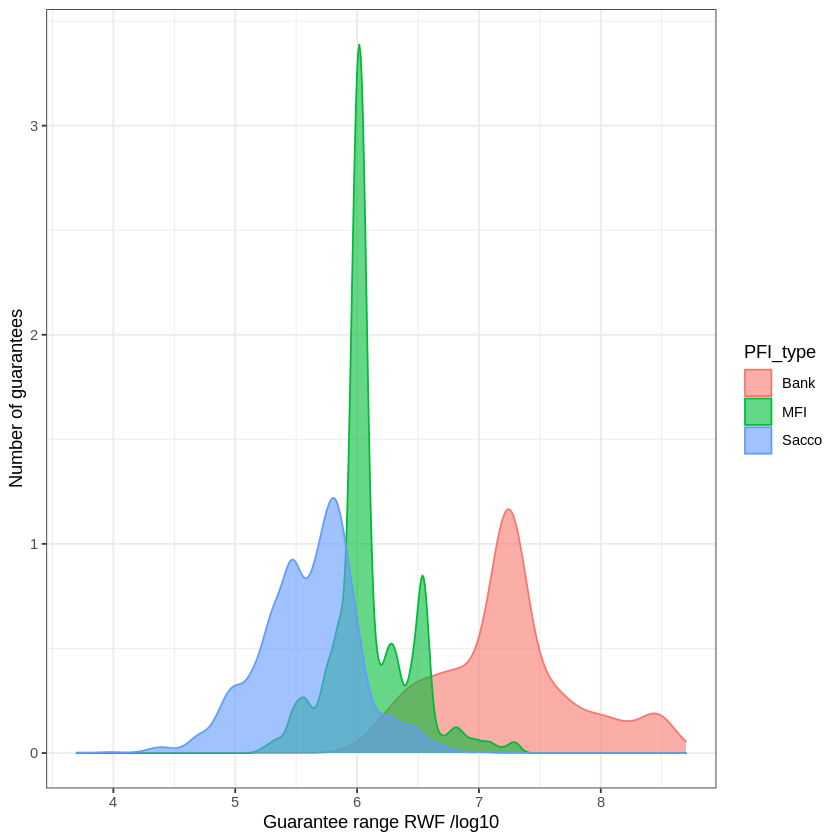

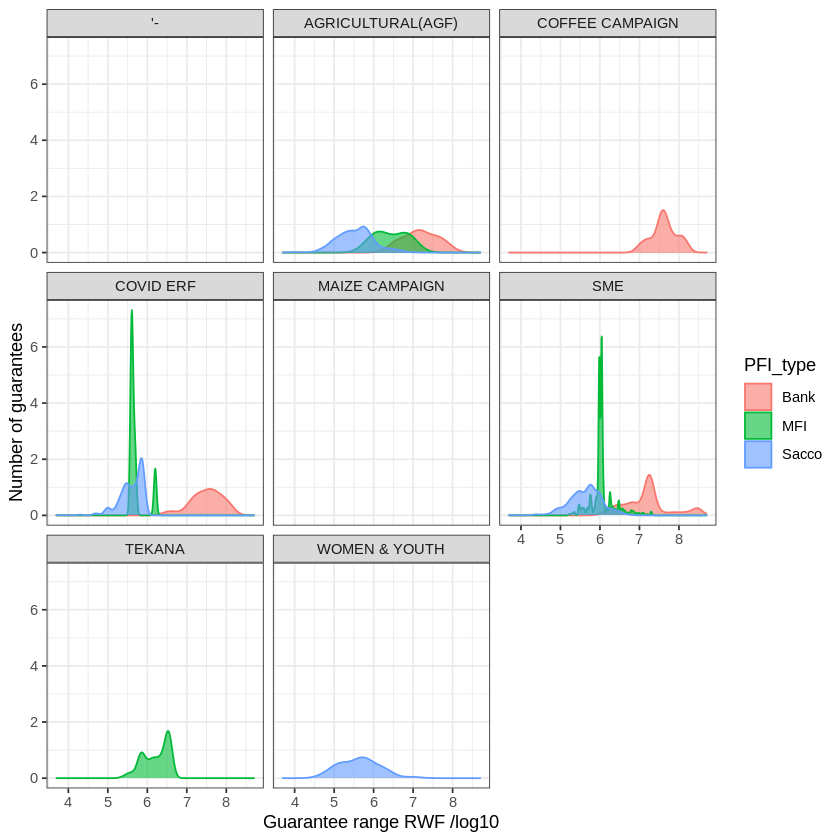

In [3]:
ggplot(Rwanda_PFIs%>%filter(!is.na(Guarantee_bins)),
       aes(Guarantee_bins, fill=PFI_type))+
geom_histogram(stat="count")+
xlab(label="Guarantee range RWF")+
ylab(label="Number of guarantees")+
  coord_flip()

ggplot(Rwanda_PFIs,aes(log10(Total_GA),fill = PFI_type, colour = PFI_type))+
 geom_density(alpha=0.6)+
  xlab(label="Guarantee range RWF /log10")+
  ylab(label="Number of guarantees")+
  theme_bw()

ggplot(Rwanda_PFIs,aes(log10(Total_GA),fill = PFI_type, colour = PFI_type))+
 geom_density(alpha=0.6)+
  xlab(label="Guarantee range RWF /log10")+
  ylab(label="Number of guarantees")+
  theme_bw()+ 
facet_wrap(~G_type)



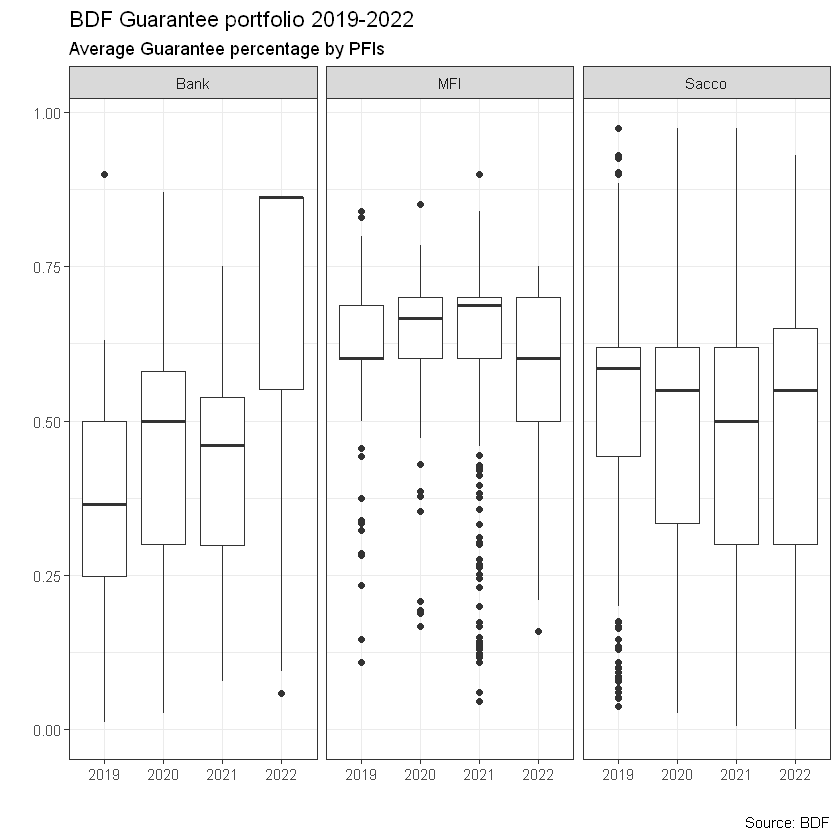

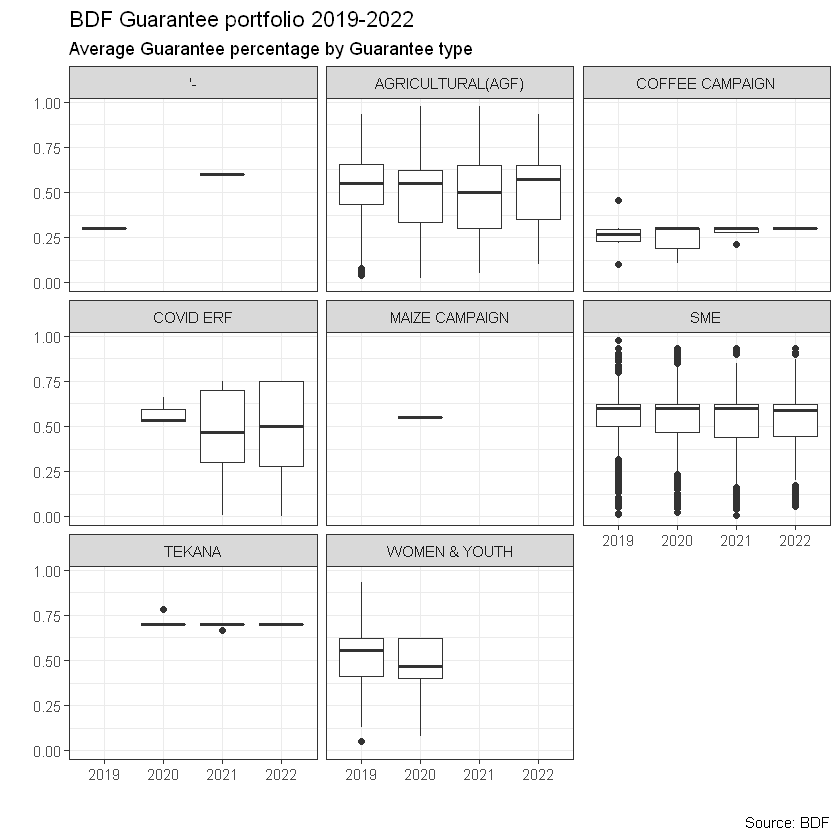

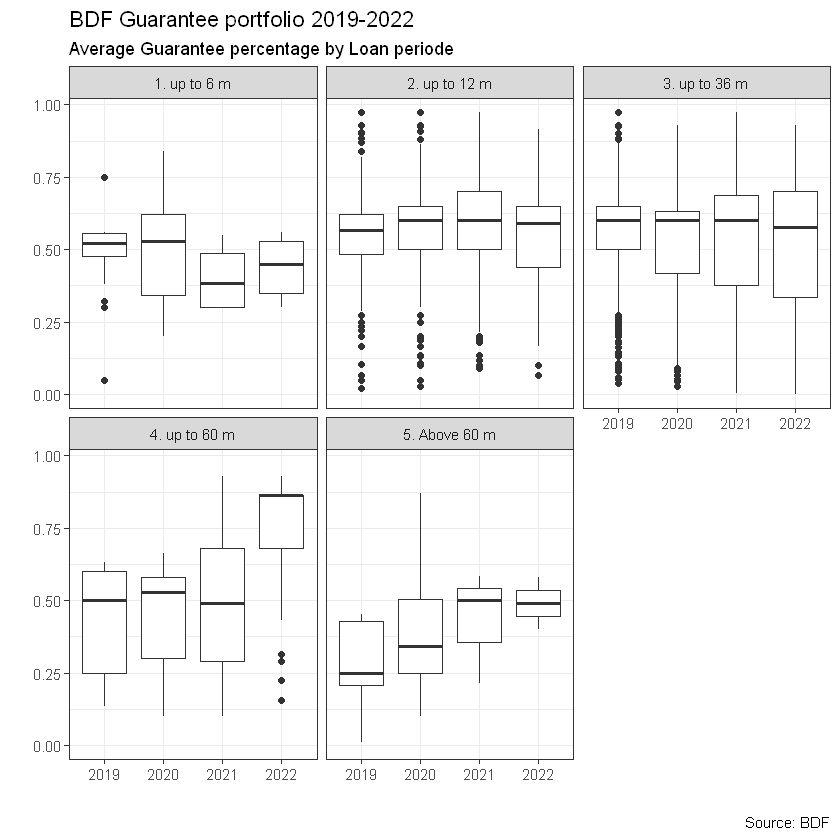

In [ ]:
# per PFIs -using Guarantee amount/Total loan amount
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%filter(GP<1), aes(Year1, GP))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Guarantee percentage by PFIs",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~PFI_type)

# per Guarantee type
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%filter(GP<1), aes(Year1, GP))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Guarantee percentage by Guarantee type",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~G_type)

# per maturity
Rwanda_PFIs%>%
mutate(GP=Total_GA/Total_LA)%>%
filter(GP<1)%>%
       mutate(LP=case_when(Loan_period<7 ~ "1. up to 6 m",
                    Loan_period<13 ~ "2. up to 12 m",
                    Loan_period<37 ~ "3. up to 36 m",
                    Loan_period<61 ~"4. up to 60 m",
                    Loan_period>60 ~"5. Above 60 m"))%>%
ggplot(., aes(Year1, GP))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Guarantee percentage by Loan period",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~LP)



## 3. Guarantee percent
<p>plot</p>

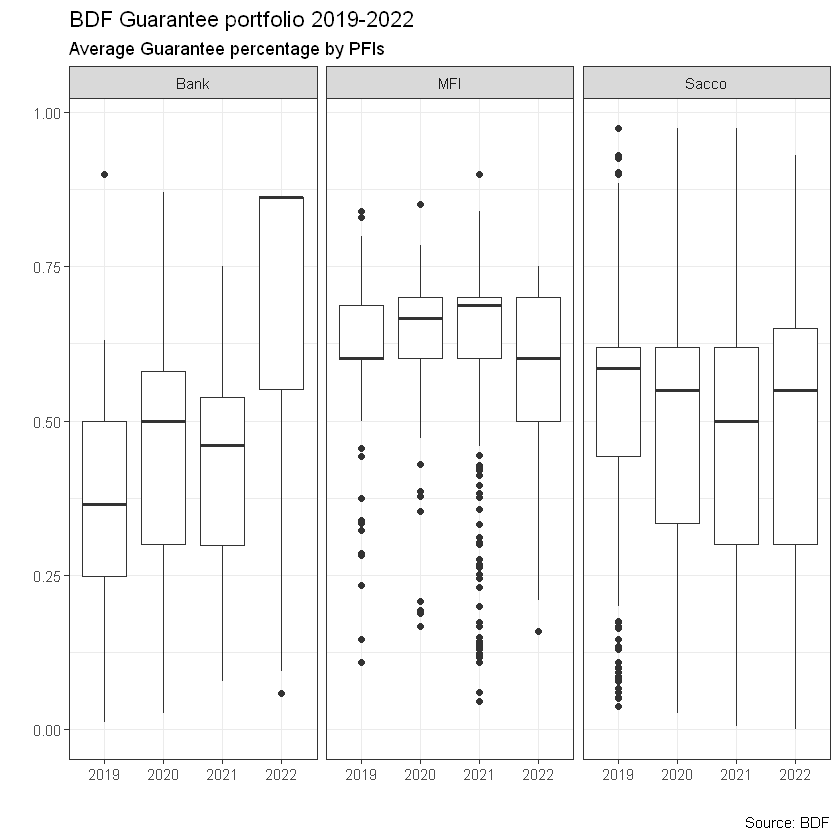

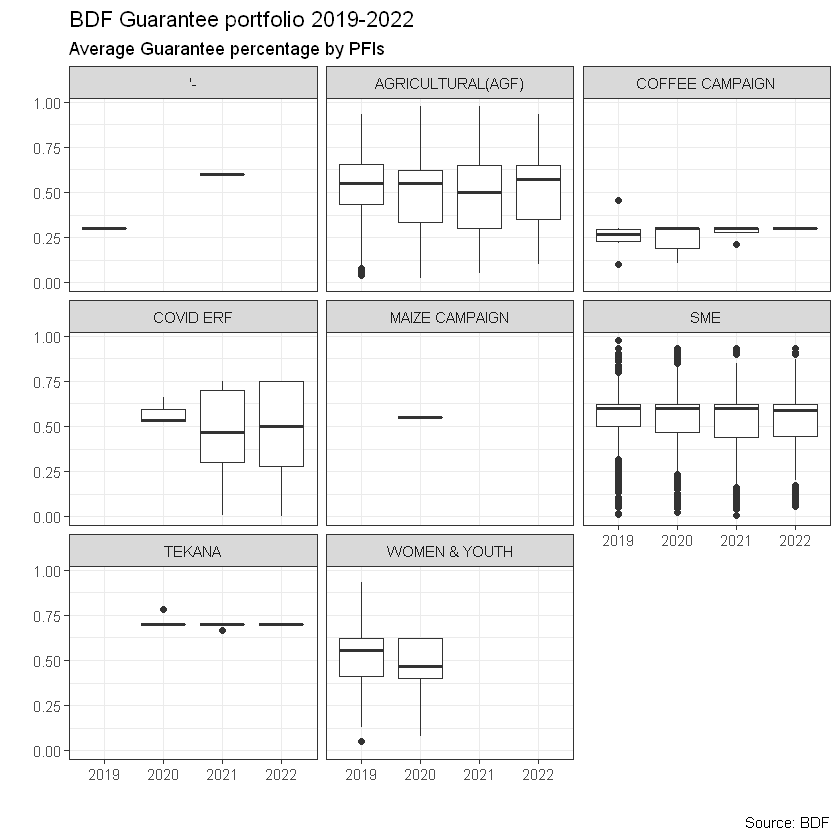

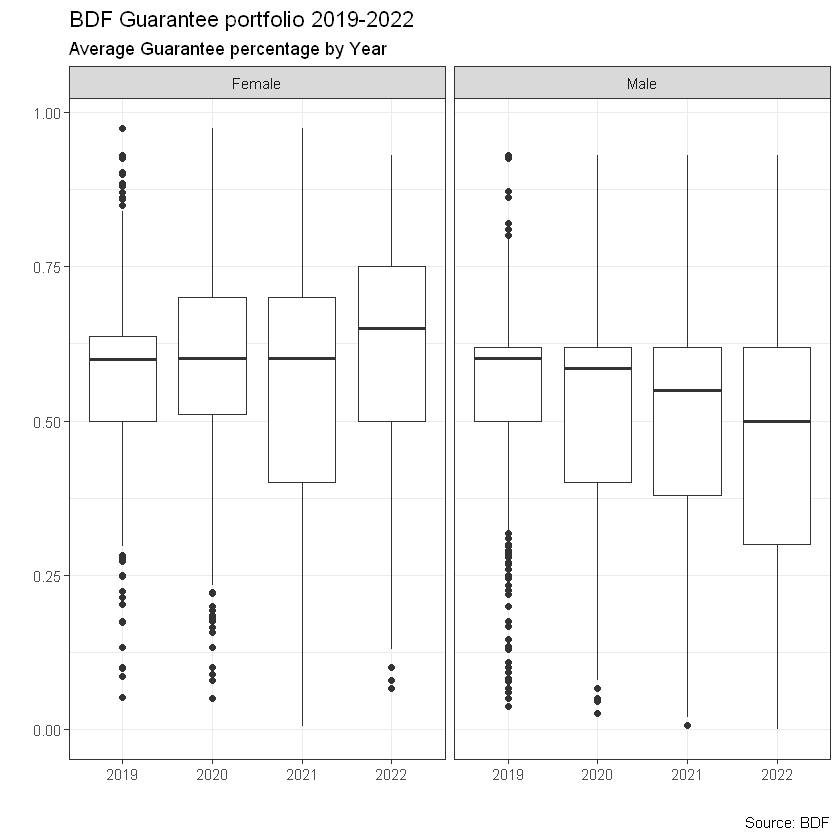

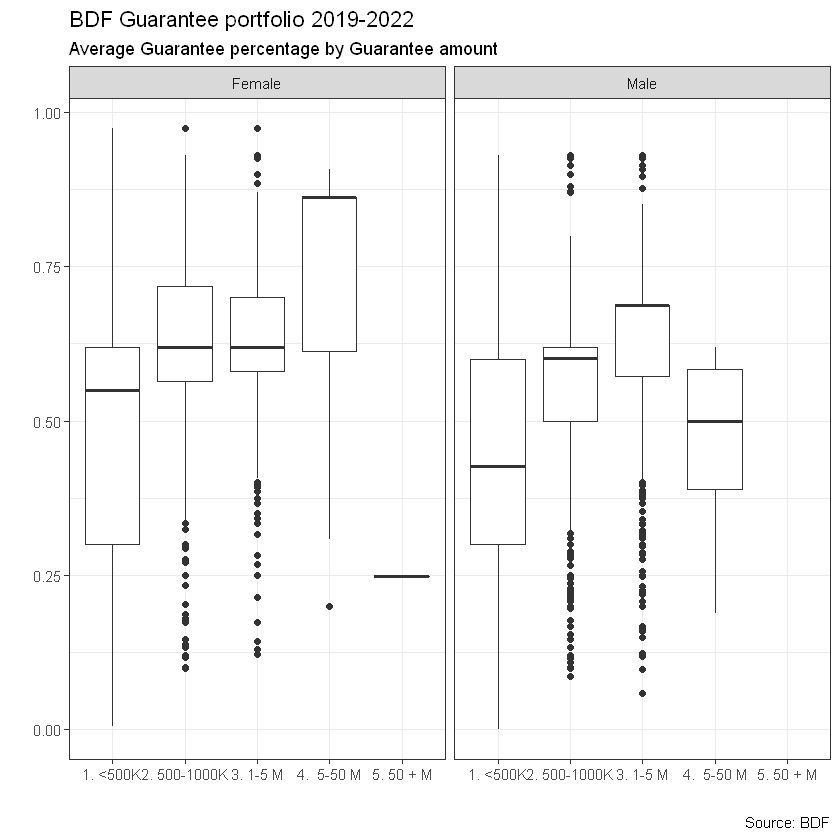

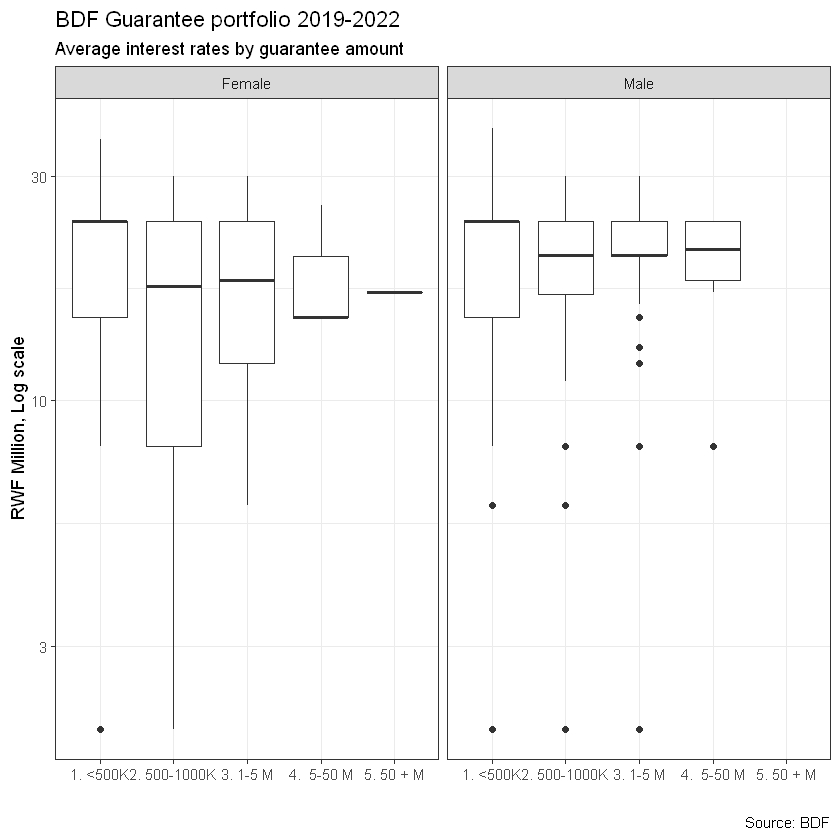

In [ ]:
# per PFIs- using Guarantee amount/Total loan amount
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%filter(GP<1), aes(Year1, GP))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Guarantee percentage by PFIs",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~PFI_type)
# per guarantee type
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%filter(GP<1), aes(Year1, GP))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Guarantee percentage by PFIs",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~G_type)

## 4. By Type of Guarantee
<p>As ...<p>

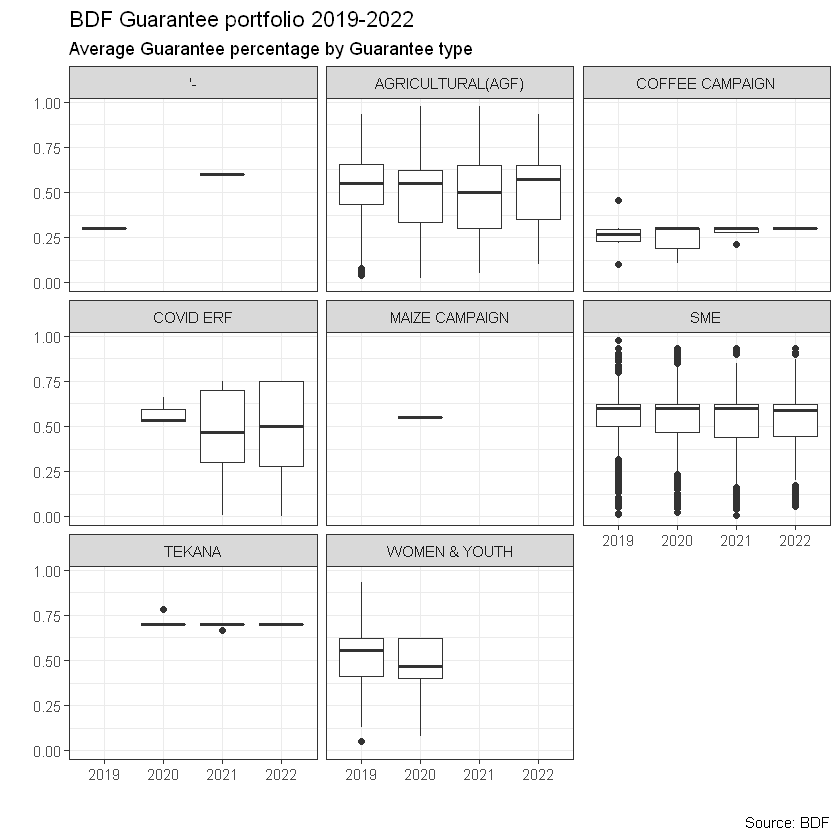

In [ ]:
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%filter(GP<1), aes(Year1, GP))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Guarantee percentage by Guarantee type",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~G_type)

## 5. By interest rate
<p>......</p>

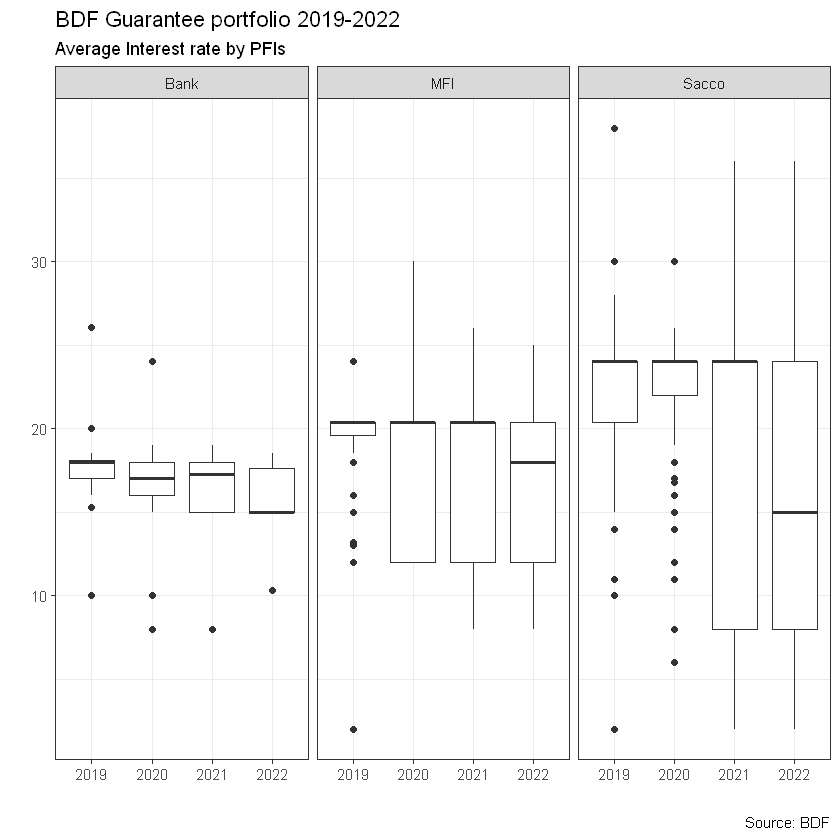

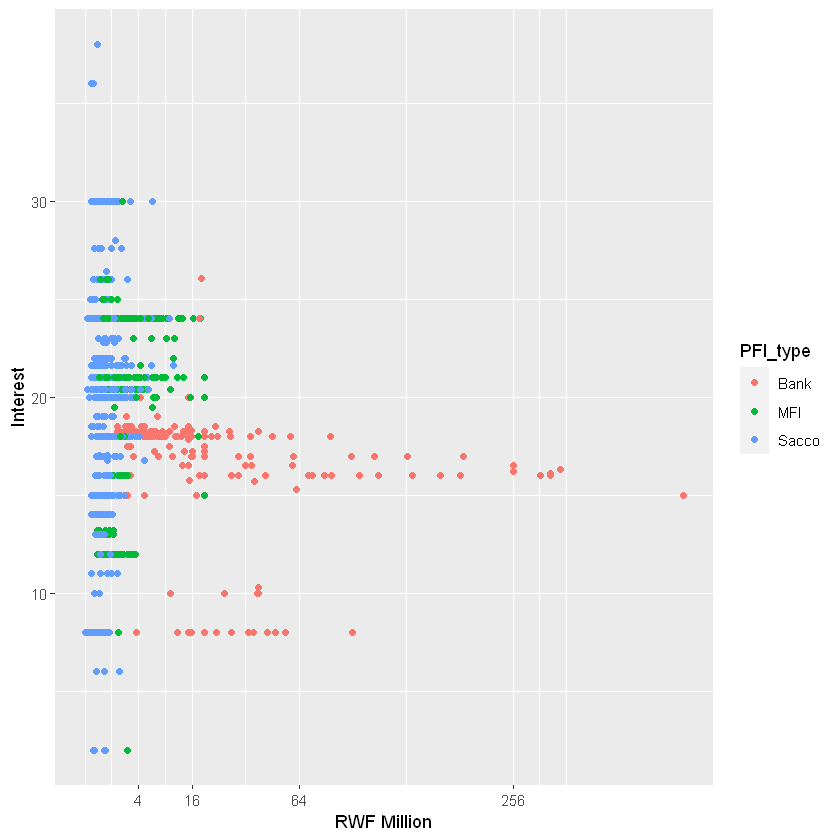

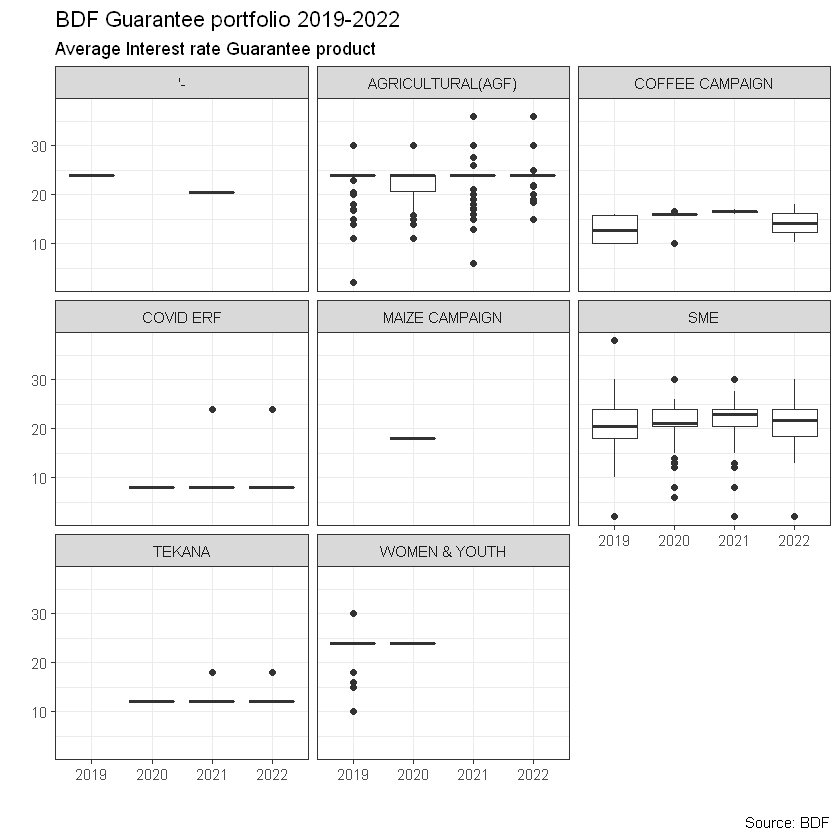

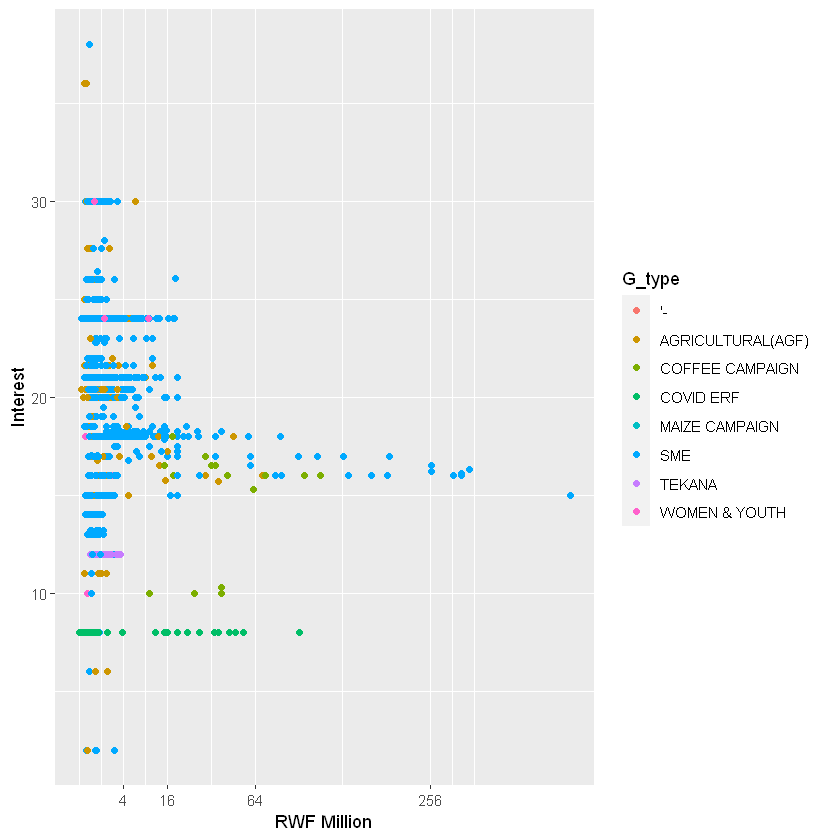

In [ ]:
#by PFIs
ggplot(Rwanda_PFIs, aes(Year1, Interest))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Interest rate by PFIs",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~PFI_type)

ggplot(Rwanda_PFIs, aes(Total_GA/1000000,Interest, color=PFI_type))+
  geom_point()+
  scale_x_sqrt(name="RWF Million",
                labels = scales::comma,
                breaks = trans_breaks("log2", function(x) 2^x))


#by guarantee product
ggplot(Rwanda_PFIs, aes(Year1, Interest))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Interest rate Guarantee product",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~G_type)

ggplot(Rwanda_PFIs, aes(Total_GA/1000000,Interest, color=G_type))+
  geom_point()+
  scale_x_sqrt(name="RWF Million",
                labels = scales::comma,
                breaks = trans_breaks("log2", function(x) 2^x))

## 6. Regression analysis 
<p>....</p>

`geom_smooth()` using formula 'y ~ x'


`geom_smooth()` using formula 'y ~ x'


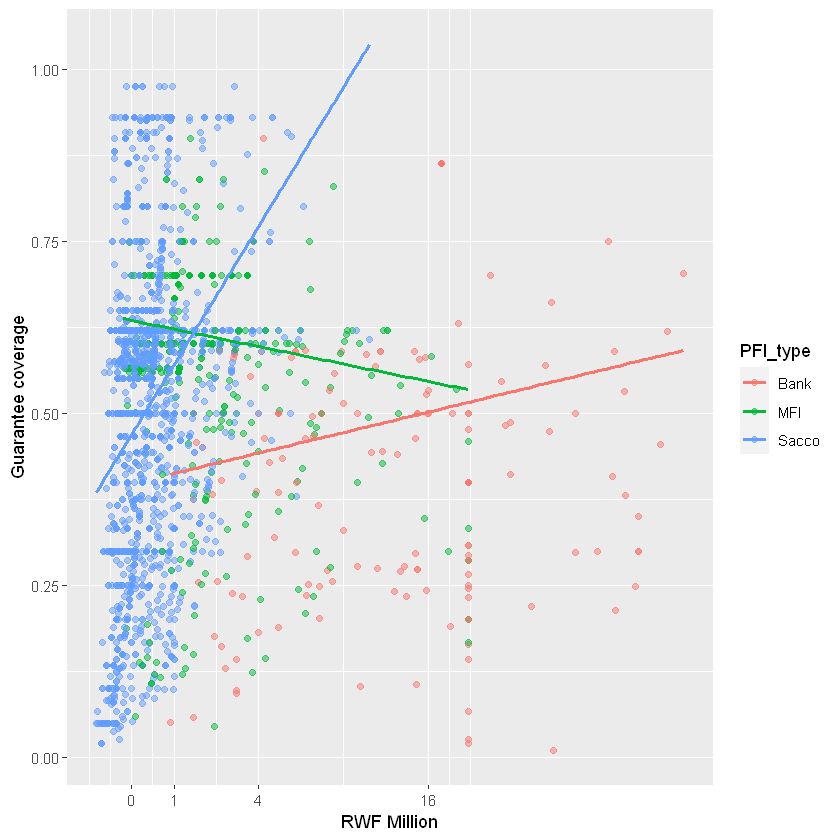

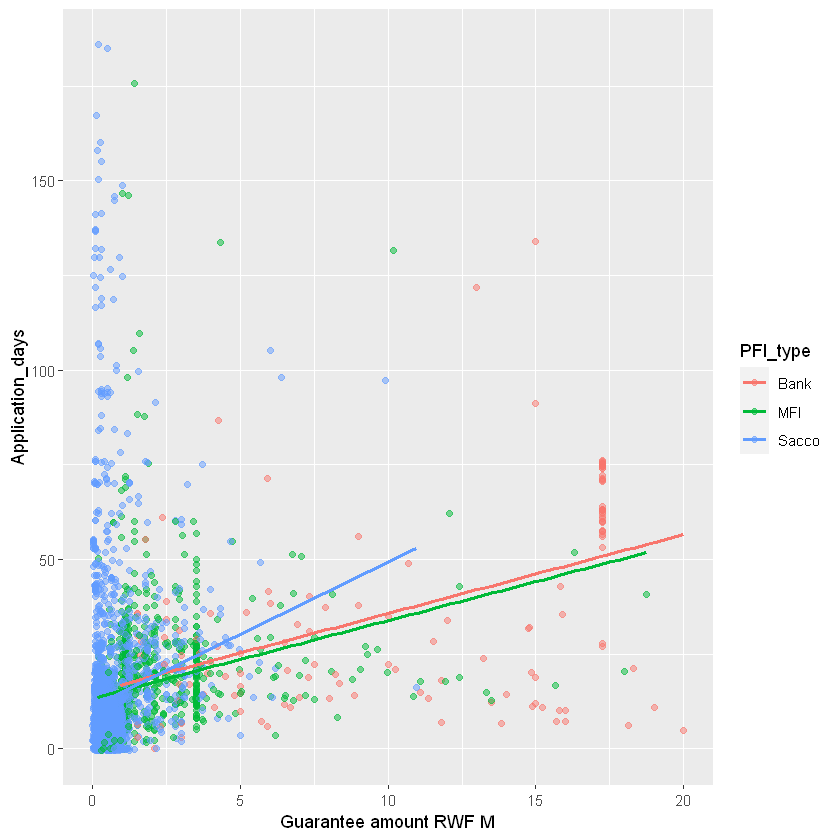

In [ ]:
# By guarantee amount - Less than RWF 50 million
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%filter(GP>0.01,GP<1,Total_GA<50000000), aes(Total_GA/1000000,GP, color=PFI_type))+
  geom_point(position="jitter",alpha=0.5)+
  geom_smooth(method="lm",se=FALSE)+
  scale_x_sqrt(name="RWF Million",
               labels = scales::comma,
               breaks = trans_breaks("log2", function(x) 2^x))+
  scale_y_continuous(name="Guarantee coverage")
# by application                                     
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%
         filter(Application_days<200,GP<1, Total_GA<20000000),
       aes(Total_GA/1000000,Application_days, color=PFI_type))+
       geom_point(position="jitter",alpha=0.5)+
      geom_smooth(method="lm",se=FALSE)+
  scale_x_continuous(name="Guarantee amount RWF M")

## 7. By Gender
<p>...</p>

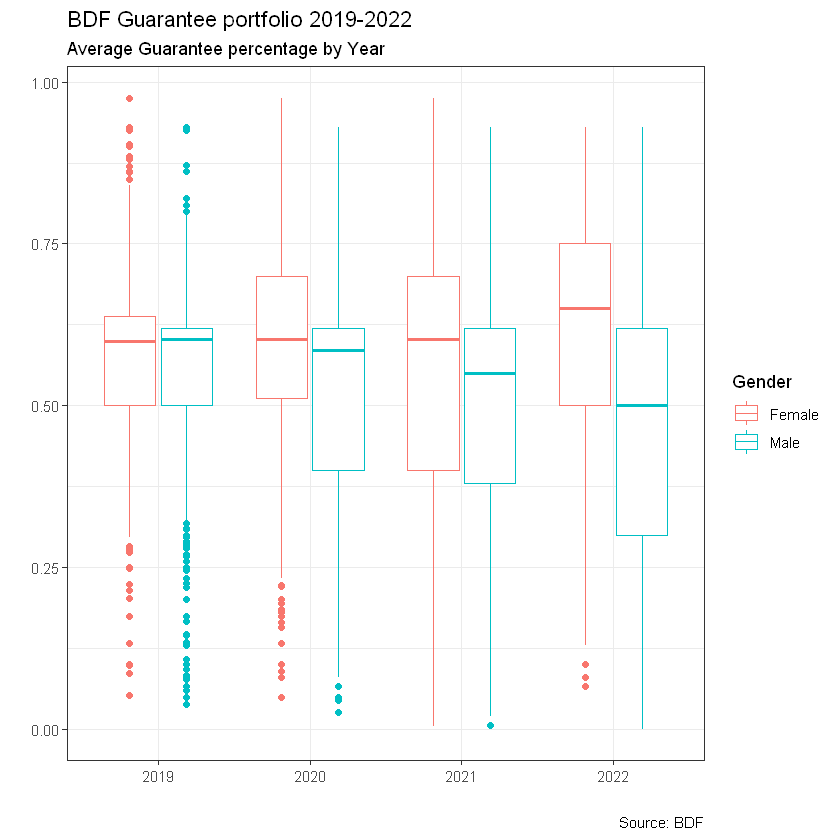

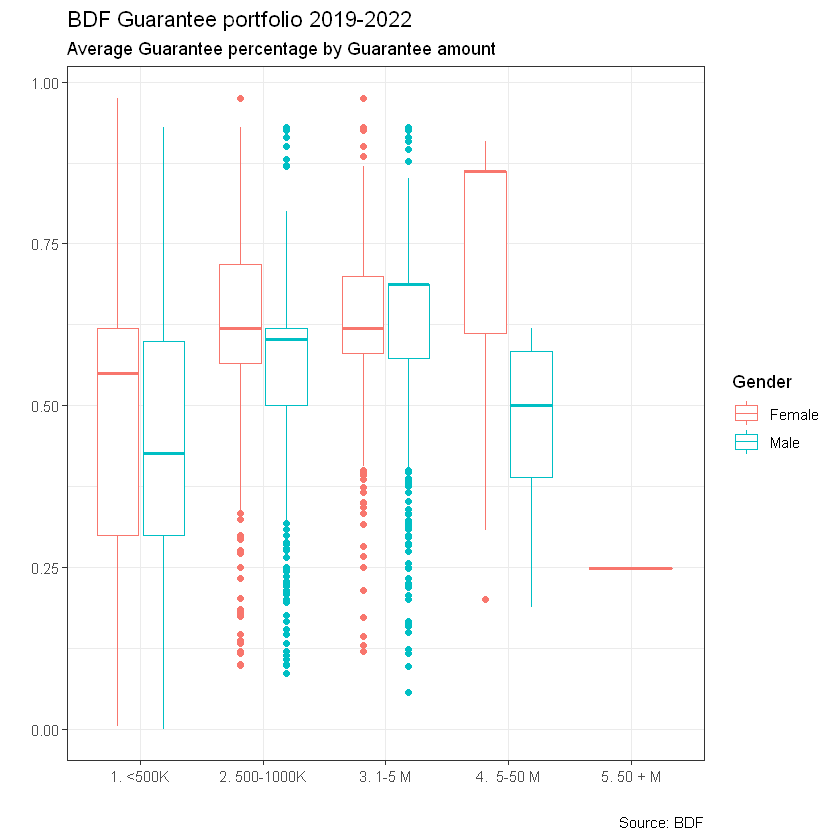

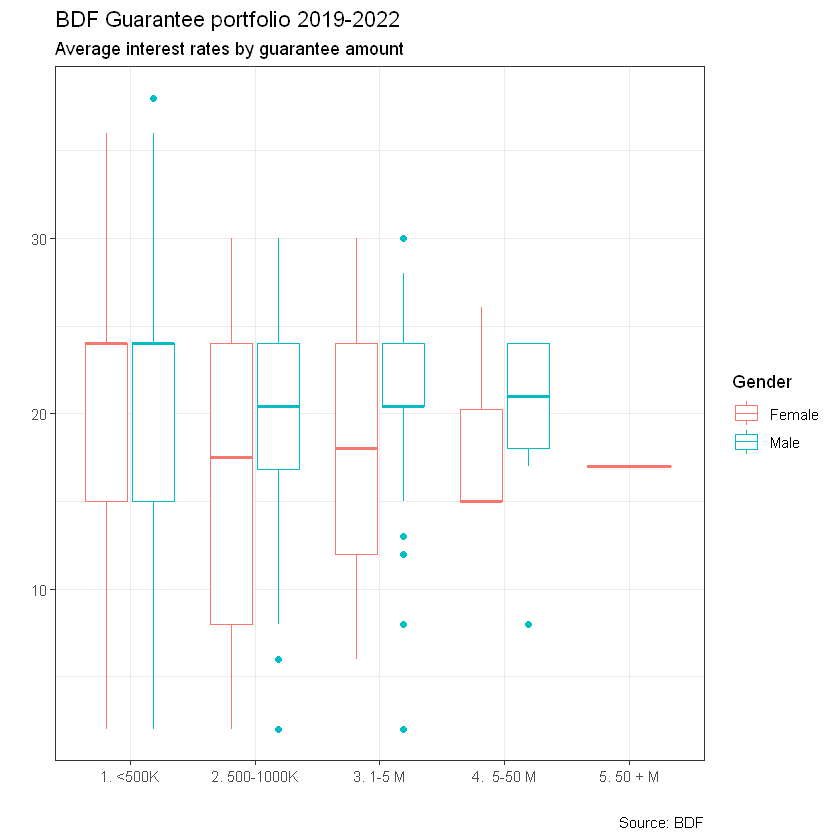

In [ ]:
# By gender
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%filter(GP<1,Gender %in% c("Male","Female")), aes(Year1, GP, color=Gender))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Guarantee percentage by Year",
       caption = "Source: BDF", 
       x = "",
       y = "")
# By gender and guarantee amount
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%filter(GP<1,Gender %in% c("Male","Female")), aes(Guarantee_bins, GP,color=Gender))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Guarantee percentage by Guarantee amount",
       caption = "Source: BDF", 
       x = "",
       y = "")
# By gender and Interest rate
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%filter(GP<1,Gender %in% c("Male","Female")), aes(Guarantee_bins, Interest,color=Gender))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average interest rates by Guarantee amount",
       caption = "Source: BDF", 
       x = "",
       y = "")

## 8. Customer satisfaction score
<p>Number of positive responses / Total responses</p>

Adding missing grouping variables: `Q`


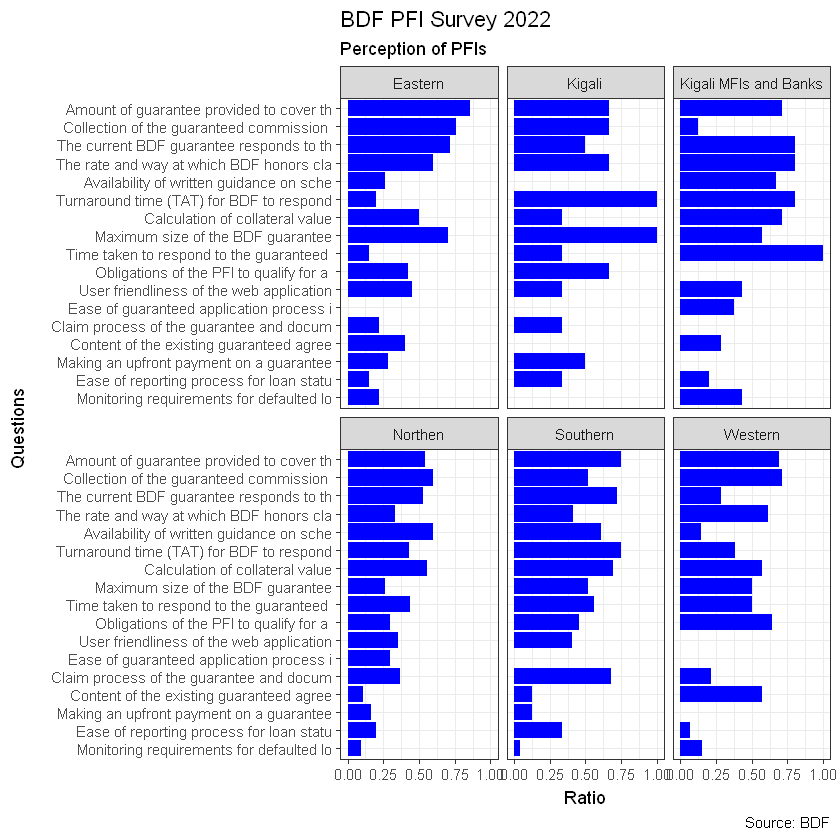

In [ ]:
Overview1%>% 
group_by(Q,Province)%>%
mutate(Total=n())%>%
ungroup()%>%
filter(Group =="Dissatisfied"|Group =="Very dissatisfied")%>%
group_by(Q,Province)%>%
summarise(Total_Dis=n(), Total=max(Total), Ratio =Total_Dis/Total)%>%
mutate(str=substr(Q,1,40))%>%
select(-Q)%>%
arrange(desc(Ratio))%>%
ggplot(.,aes(fct_reorder(str,Ratio),(Ratio)))+
geom_col(fill="blue")+
theme_bw()+labs(title = "BDF PFI Survey 2022",
       subtitle = "Perception of PFIs",
       caption = "Source: BDF", 
       x = "Questions",
       y = "Ratio")+
coord_flip()+
facet_wrap(~Province)


## 9.PFI Survey data
<p>  </p>

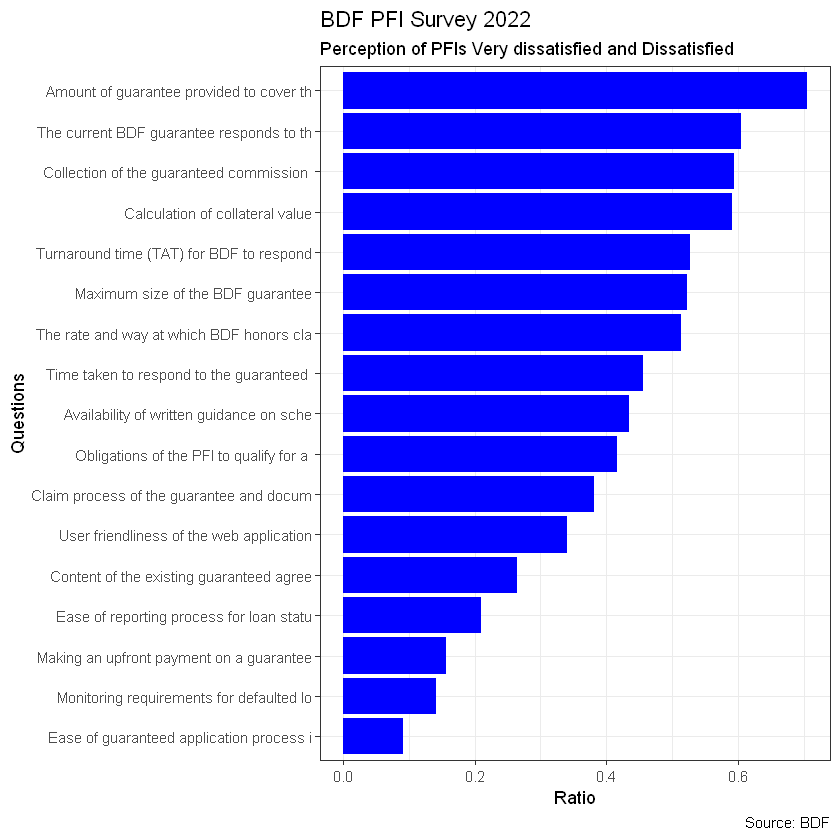

In [ ]:
Overview1%>% 
group_by(Q)%>%
mutate(Total=n())%>%
ungroup()%>%
filter(Group =="Dissatisfied"|Group =="Very dissatisfied")%>%
group_by(Q)%>%
summarise(Total_Dis=n(), Total=max(Total), Ratio =Total_Dis/Total)%>%
mutate(str=substr(Q,1,40))%>%
select(-Q)%>%
arrange(desc(Ratio))%>%
ggplot(.,aes(fct_reorder(str,Ratio),(Ratio)))+
geom_col(fill="blue")+
theme_bw()+labs(title = "BDF PFI Survey 2022",
       subtitle = "Perception of PFIs Very dissatisfied and Dissatisfied",
       caption = "Source: BDF", 
       x = "Questions",
       y = "Ratio")+
coord_flip()

## 10. Banks
<p></p>

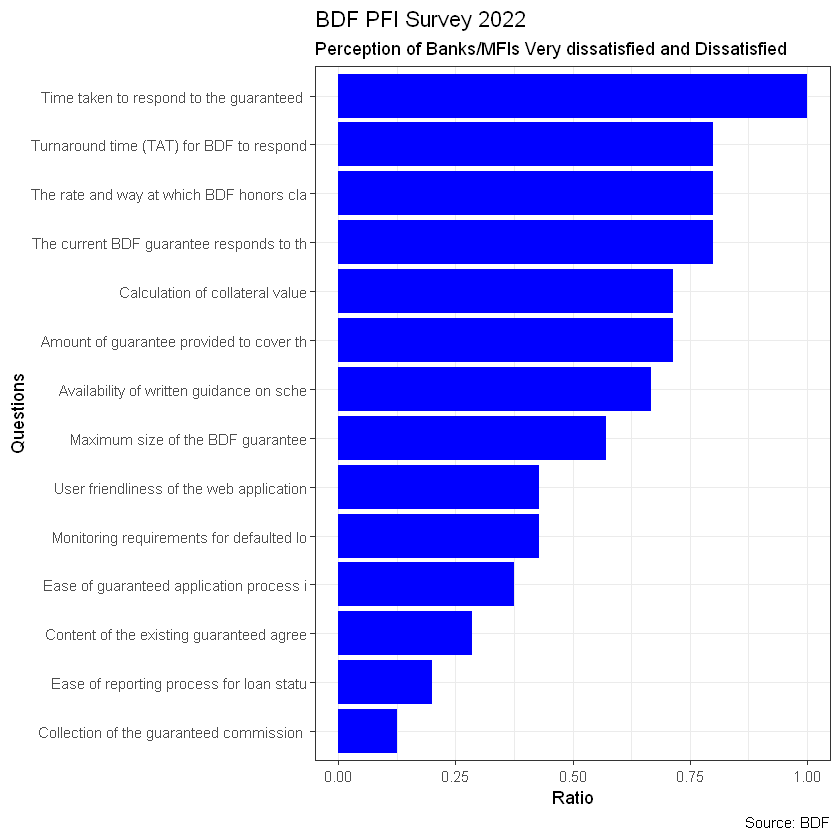

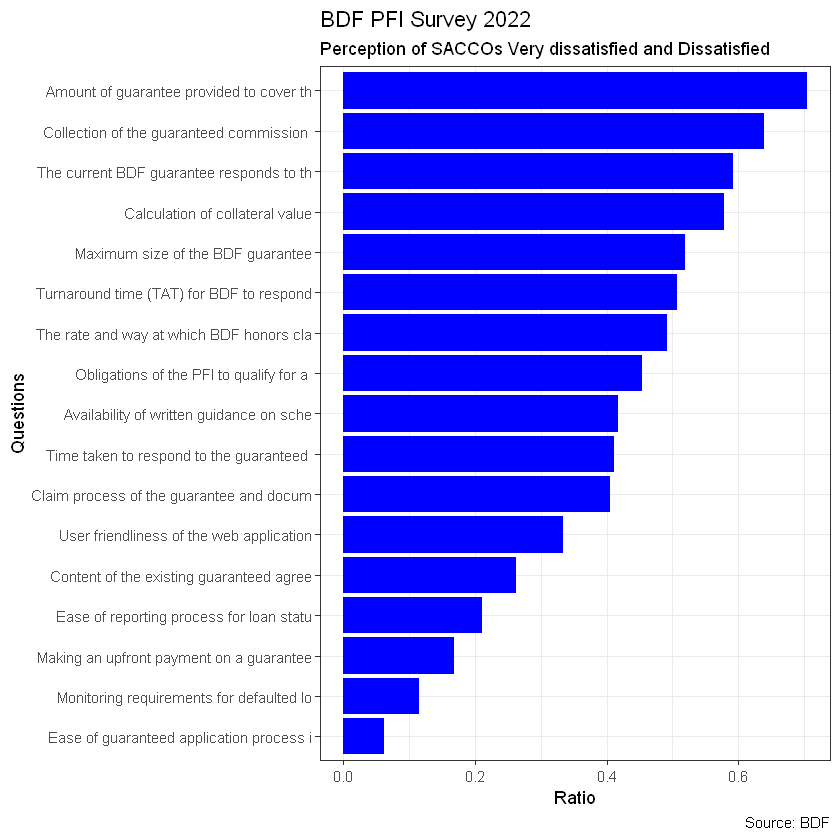

In [ ]:
Overview1%>% 
filter(PFI_type!="SACCOs")%>%
group_by(Q)%>%
mutate(Total=n())%>%
ungroup()%>%
filter(Group =="Dissatisfied"|Group =="Very dissatisfied")%>%
group_by(Q)%>%
summarise(Total_Dis=n(), Total=max(Total), Ratio =Total_Dis/Total)%>%
mutate(str=substr(Q,1,40))%>%
select(-Q)%>%
arrange(desc(Ratio))%>%
ggplot(.,aes(fct_reorder(str,Ratio),(Ratio)))+
geom_col(fill="blue")+
theme_bw()+labs(title = "BDF PFI Survey 2022",
       subtitle = "Perception of Banks/MFIs Very dissatisfied and Dissatisfied",
       caption = "Source: BDF", 
       x = "Questions",
       y = "Ratio")+
coord_flip()

#saccos

Overview1%>% 
filter(PFI_type=="SACCOs")%>%
group_by(Q)%>%
mutate(Total=n())%>%
ungroup()%>%
filter(Group =="Dissatisfied"|Group =="Very dissatisfied")%>%
group_by(Q)%>%
summarise(Total_Dis=n(), Total=max(Total), Ratio =Total_Dis/Total)%>%
mutate(str=substr(Q,1,40))%>%
select(-Q)%>%
arrange(desc(Ratio))%>%
ggplot(.,aes(fct_reorder(str,Ratio),(Ratio)))+
geom_col(fill="blue")+
theme_bw()+labs(title = "BDF PFI Survey 2022",
       subtitle = "Perception of SACCOs Very dissatisfied and Dissatisfied",
       caption = "Source: BDF", 
       x = "Questions",
       y = "Ratio")+
coord_flip()

## 11. 
<p></p>

## 12. 
<p></p>

In [ ]:
head(Rwanda_PFIs)

PFI_type,PFI_name,G_type,Total_GA,Total_LA,Year,Interest,DPD,Application_days,Ref,Age,Gender,Economic_activity,Guarantee_bins,Legal_status,Loan_period,Province,Sector,District,Year1
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037217,41,Female,Business Services Other,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037218,42,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037220,52,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037229,47,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037232,48,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,Abahizi Tumba,SME,650000,1e+06,2019,30,0 days,17,AP-FI/07/2019/0021845,27,Male,Wholesale and Distribution Other,2. 500-1000K,Individual,24,NORTHERN PROVINCE,TUMBA,RULINDO,2019


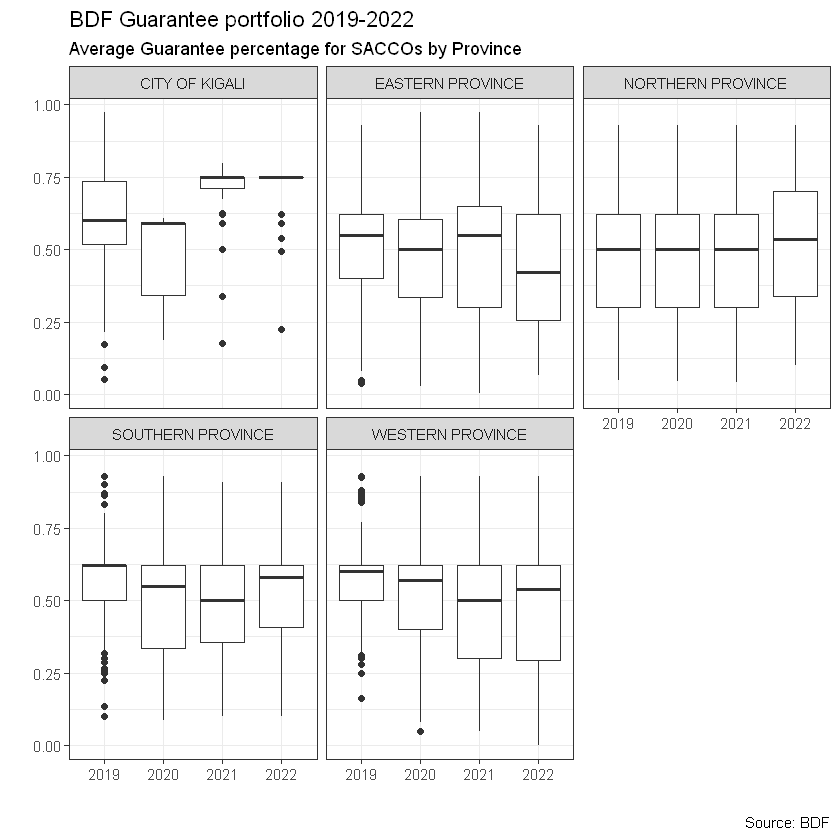

In [ ]:
# per PFIs -using Guarantee amount/Total loan amount
ggplot(Rwanda_PFIs%>%mutate(GP=Total_GA/Total_LA)%>%filter(GP<1,PFI_type=="Sacco"), aes(Year1, GP))+
  geom_boxplot()+
  theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Average Guarantee percentage for SACCOs by Province",
       caption = "Source: BDF", 
       x = "",
       y = "")+
  facet_wrap(~Province)

Adding missing grouping variables: `Q`


Province,Average_ratio,Min_ratio,Max_ra
Eastern,0.4311064,0.15000000,0.8571429
Kigali,0.5641026,0.33333333,1.0000000
Kigali MFIs and Banks,0.5649660,0.12500000,1.0000000
Northen,0.3621887,0.09523810,0.6000000
Southern,0.4822066,0.04347826,0.7500000
Western,0.4325451,0.07142857,0.7142857


Adding missing grouping variables: `Q`


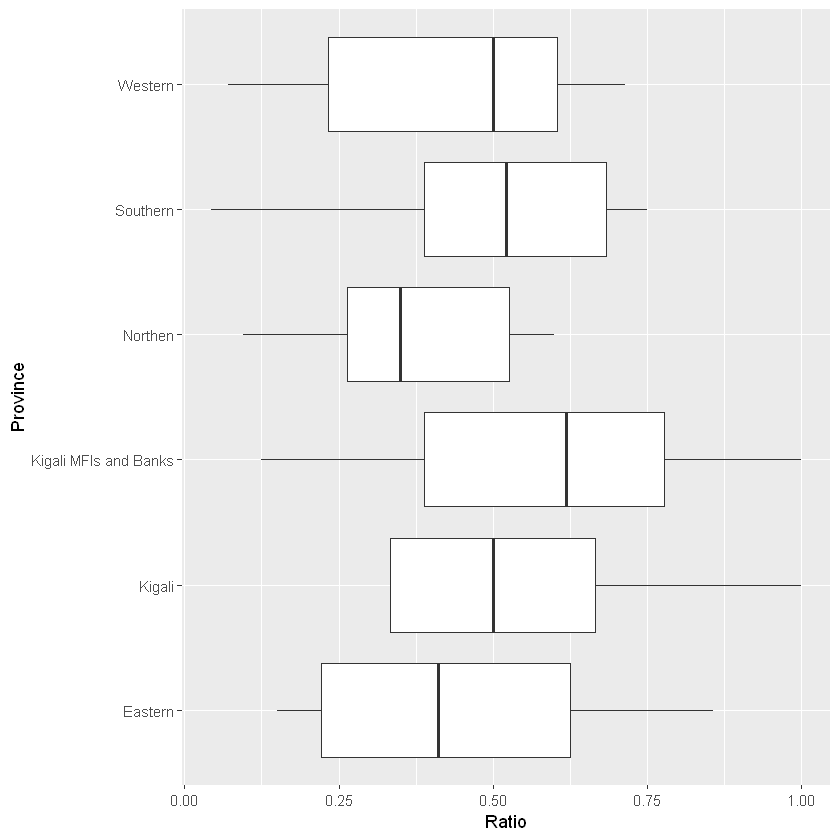

In [ ]:
Overview1%>% 
group_by(Q,Province)%>%
mutate(Total=n())%>%
ungroup()%>%
filter(Group =="Dissatisfied"|Group =="Very dissatisfied")%>%
group_by(Q,Province)%>%
summarise(Total_Dis=n(), Total=max(Total), Ratio =Total_Dis/Total)%>%
mutate(str=substr(Q,1,40))%>%
select(-Q)%>%
arrange(desc(Ratio))%>%
group_by(Province)%>%
summarise(Average_ratio=mean(Ratio), Min_ratio = min(Ratio), Max_ra = max(Ratio))

Overview1%>% 
group_by(Q,Province)%>%
mutate(Total=n())%>%
ungroup()%>%
filter(Group =="Dissatisfied"|Group =="Very dissatisfied")%>%
group_by(Q,Province)%>%
summarise(Total_Dis=n(), Total=max(Total), Ratio =Total_Dis/Total)%>%
mutate(str=substr(Q,1,40))%>%
select(-Q)%>%
arrange(desc(Ratio))%>%
group_by(Province)%>%
ggplot(.,aes(Province,Ratio))+
geom_boxplot()+
coord_flip()


Adding missing grouping variables: `Q`


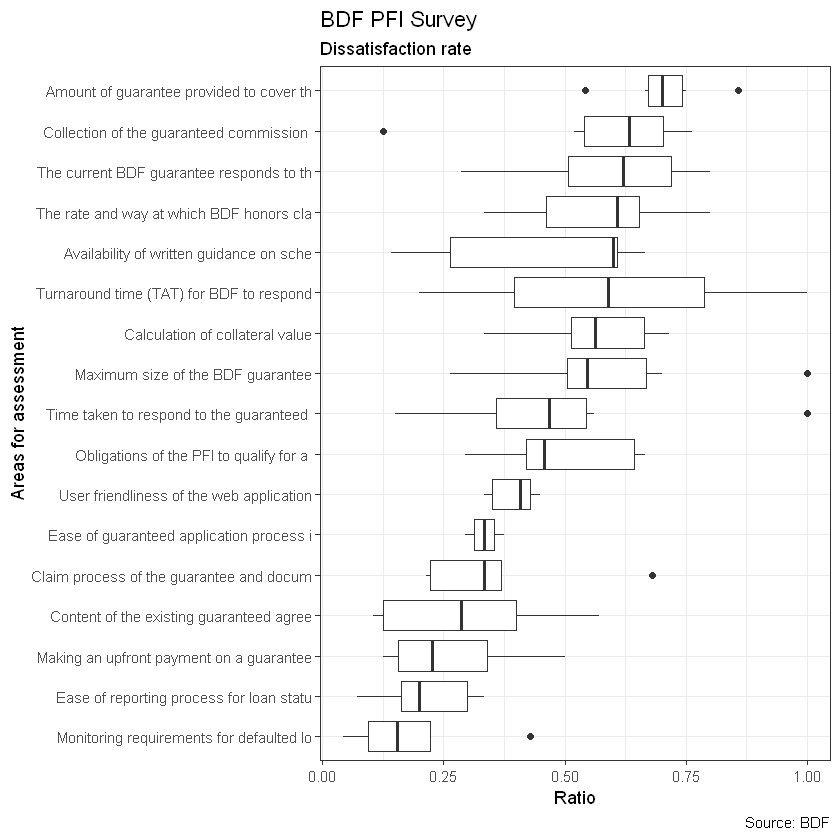

In [ ]:


Overview1%>% 
group_by(Q,Province)%>%
mutate(Total=n())%>%
ungroup()%>%
filter(Group =="Dissatisfied"|Group =="Very dissatisfied")%>%
group_by(Q,Province)%>%
summarise(Total_Dis=n(), Total=max(Total), Ratio =Total_Dis/Total)%>%
mutate(Questions=substr(Q,1,40))%>%
select(-Q)%>%
arrange(desc(Ratio))%>%
group_by(Questions)%>%
ggplot(.,aes(fct_reorder(Questions,((Ratio))),Ratio))+
geom_boxplot()+
theme_bw()+
  labs(title = "BDF PFI Survey",
       subtitle = "Dissatisfaction rate",
       caption = "Source: BDF", 
       x = "Areas for assessment",
       y = "Ratio")+
coord_flip()

In [ ]:
Rwanda_PFIs%>%
mutate(GP=Total_GA/Total_LA)%>%
summarise(Ave_GC=mean(GP), Max_GM=max(Total_GA)/1000000)

head(Rwanda_PFIs)

Ave_GC,Max_GM
0.5398172,500


PFI_type,PFI_name,G_type,Total_GA,Total_LA,Year,Interest,DPD,Application_days,Ref,Age,Gender,Economic_activity,Guarantee_bins,Legal_status,Loan_period,Province,Sector,District,Year1
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037217,41,Female,Business Services Other,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037218,42,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037220,52,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037229,47,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,ABAHIZI SACCO GIKONDO,COVID ERF,750000,1e+06,2021,8,0 days,NA,AP-FI/11/2021/0037232,48,Female,Business Services,2. 500-1000K,Individual,24,CITY OF KIGALI,GIKONDO,KICUKIRO,2021
Sacco,Abahizi Tumba,SME,650000,1e+06,2019,30,0 days,17,AP-FI/07/2019/0021845,27,Male,Wholesale and Distribution Other,2. 500-1000K,Individual,24,NORTHERN PROVINCE,TUMBA,RULINDO,2019


Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

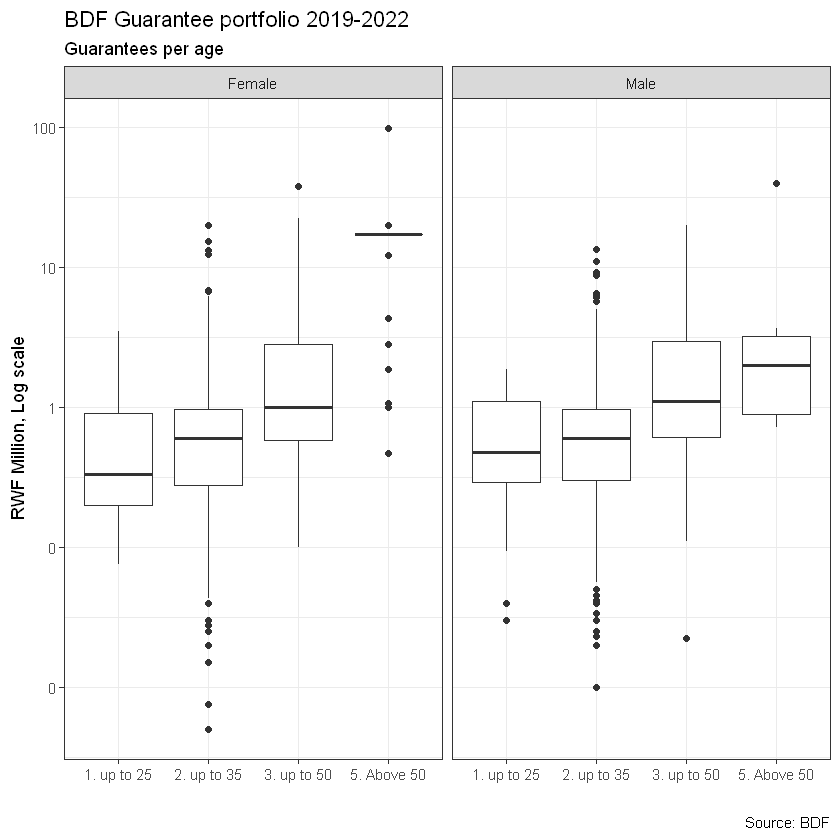

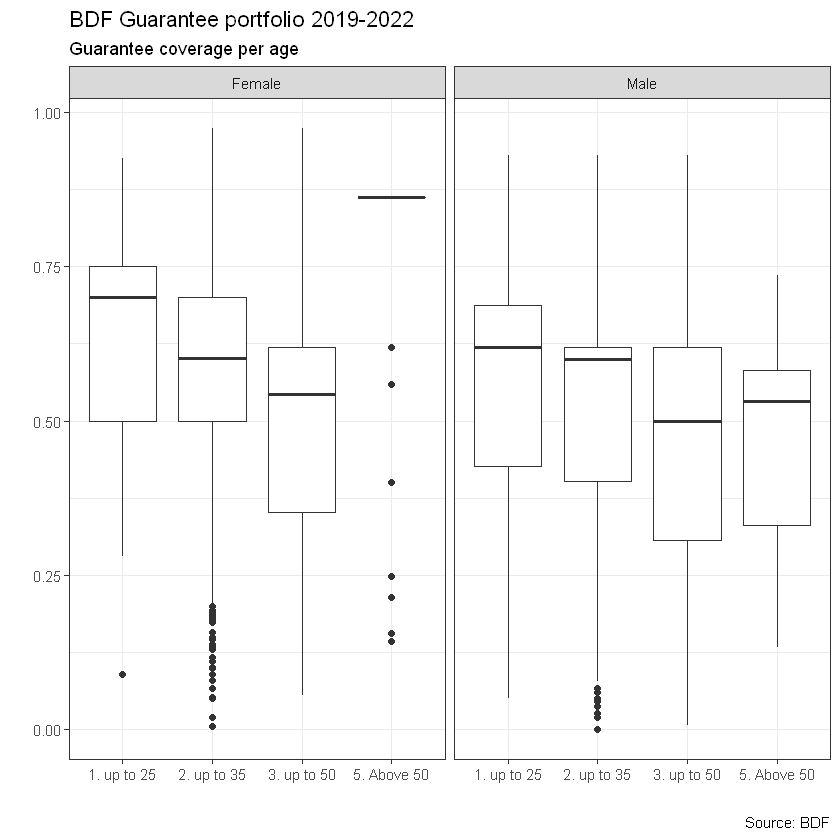

In [ ]:
ggplot(Rwanda_PFIs%>% 
       mutate(Age_G=case_when(Age<25 ~ "1. up to 25",
                    Loan_period<35 ~ "2. up to 35",
                    Loan_period<50 ~ "3. up to 50",
                    Loan_period>49 ~"5. Above 50"))%>%
       filter(Gender %in% c("Female","Male"))
       , aes(Age_G, Total_GA/1000000))+
geom_boxplot()+
scale_y_log10(name="RWF Million, Log scale",
              labels = scales::comma)+
theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Guarantees per age",
       caption = "Source: BDF", 
       x = "",
       y = "")+ 
facet_wrap(~Gender)
# guarantee coverage
ggplot(Rwanda_PFIs%>% 
       mutate(Age_G=case_when(Age<25 ~ "1. up to 25",
                    Loan_period<35 ~ "2. up to 35",
                    Loan_period<50 ~ "3. up to 50",
                    Loan_period>49 ~"5. Above 50"))%>%
       mutate(GP=Total_GA/Total_LA)%>%
filter(GP<1)%>%
       filter(Gender %in% c("Female","Male"))
       , aes(Age_G, GP))+
geom_boxplot()+
theme_bw()+
  labs(title = "BDF Guarantee portfolio 2019-2022",
       subtitle = "Guarantee coverage per age",
       caption = "Source: BDF", 
       x = "",
       y = "")+ 
facet_wrap(~Gender)